# Import Modules

In [7]:
import pandas as pd
import numpy as np

import utils

# Load Data

In [8]:
target_vegetable = "トマト"
train_size = 4000

In [9]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=train_size, T=10)

# Training

In [10]:
future = target_values.shape[0] - train_size
pred_y, _ = utils.pipeline_rnn(train_x, train_y, train, test, test_y, future=future, num_epochs=200)

training loss = 1.0100133419036865
test loss = 0.8782787322998047
training loss = 0.5834456086158752
test loss = 2.528481960296631
training loss = 0.21492795646190643
test loss = 0.9478949904441833
training loss = 0.17984460294246674
test loss = 0.9701004028320312
training loss = 0.16213606297969818
test loss = 0.5564737319946289
training loss = 0.15759006142616272
test loss = 0.6218534111976624
training loss = 0.1498052328824997
test loss = 0.6281188726425171
training loss = 0.155331090092659
test loss = 0.5322718620300293
early stop at: 0.420184463262558


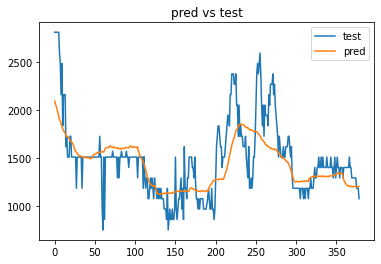

In [11]:
pred_y = pred_y.cpu().detach().numpy()
pred = np.concatenate([pred_y.reshape(-1, 1), test[:, 1:]], axis=1)

utils.plot_prediction(pred, test, ss)

# Terminal Score

In [ ]:
utils.get_terminal_score()